In [ ]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('d:/data/t0_predict_data.csv')
df.shape

In [ ]:
df['trade_time'] = pd.to_datetime(df['trade_time'])
#考虑到需要预测的是业务日各渠道的总量，所以按照业务日定义将交易时间倒推9.5小时，以便聚合数据
df['trade_date'] = (df['trade_time'] - datetime.timedelta(hours = 9.5)).dt.date
df.head()

In [ ]:
#数据的起始点为2018年1月1日，预测的业务日为2019年2月22日各渠道的业务总量，因此，可供对比的日期段仅为【2018-01-01：2018-02-28】-【2019-01-01： 2019-02-22】
#时间段较短，数据维度低，且预测的仅为后一日的交易总量，因此不适合常规的机器学习算法（容易过拟合）
#先对同比时间段内各渠道的业务量相关性进行探索性分析
con_dates = [datetime.date(2018,1,1), datetime.date(2018,3,6)] 
con_df = df[(df['trade_date'] >= con_dates[0]) & (df['trade_date'] <= con_dates[1])]

exp_dates = [datetime.date(2019,1,1), datetime.date(2019,2,28)] 
exp_df = df[(df['trade_date'] >= exp_dates[0]) & (df['trade_date'] <= exp_dates[1])]

sub_df = pd.concat([con_df, exp_df], axis = 0)

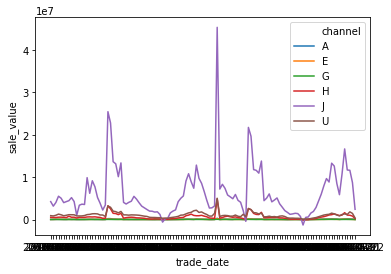

In [109]:
#按业务日和渠道聚合交易量数据，并可视化
sub_df = sub_df.groupby(['trade_date', 'channel'])['sale_value'].agg('sum').reset_index()
sub_df['trade_date'] = sub_df['trade_date'].astype(str)
sns.lineplot(x = "trade_date", y = "sale_value", hue="channel", data = sub_df)

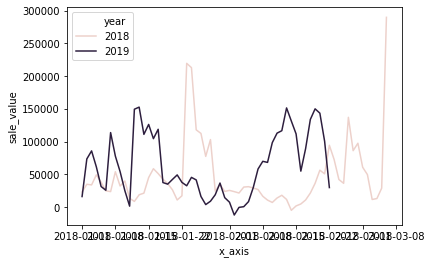

In [150]:
def date_pattern_compare(agg_df, channel):
    _df = agg_df[agg_df['channel'] == channel]
    _df.loc[:, 'trade_date'] = pd.to_datetime(_df['trade_date'])
    _df.loc[:,'year'] = _df['trade_date'].dt.year
    _df.loc[:,'x_axis'] = _df['trade_date']
    _df.loc[_df['x_axis'] >= pd.to_datetime('2019-01-01'),'x_axis'] -= datetime.timedelta(days = 365)
    return _df
A_df = date_pattern_compare(sub_df, channel = 'A')
sns.lineplot(x = 'x_axis', y = "sale_value", hue = 'year', data = A_df)

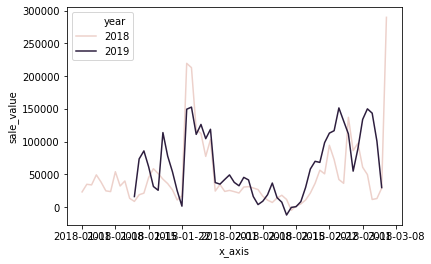

In [151]:
#从channel A两年的交易量可以看到明显的时间规律，由于2018年春节是2月16日，2019年春节是2月5日，相差11天
#将channel A中2019年的数据向后平移11天，并可视化
A_df.loc[A_df['year'] == 2019, 'x_axis'] += datetime.timedelta(days = 11)
sns.lineplot(x = 'x_axis', y = "sale_value", hue = 'year', data = A_df)

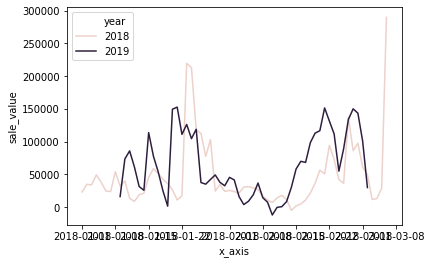

In [152]:
#从上图可以看到，平移后的数据规律更加显著，两年正月初一当天都发生了交易量的大幅增加，但在临近时间段存在一定的偏移
#可能的远因是，2018年春节后11天已接近3月8日
#考虑到需要预测的业务日为2019年2月22日，更应该保持临近时间段数据规律的一致性，因此考虑将2019年的数据再向前平移
A_df.loc[A_df['year'] == 2019, 'x_axis'] -= datetime.timedelta(days = 3)
sns.lineplot(x = 'x_axis', y = "sale_value", hue = 'year', data = A_df)


In [ ]:
#从上图可以看出，平移后channel A在近期的峰值规律与去年较一致，且2019年channel A在2019年2月22日近期的交易量较去年同期略高

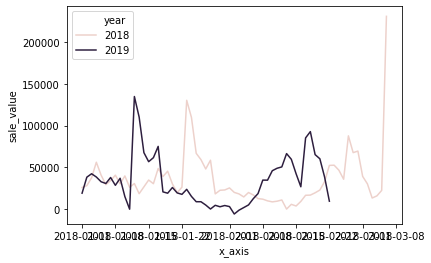

In [159]:
#同理，对其他渠道进行探索性分析
#channel E
E_df = date_pattern_compare(sub_df, channel = 'E')
sns.lineplot(x = 'x_axis', y = "sale_value", hue = 'year', data = E_df)

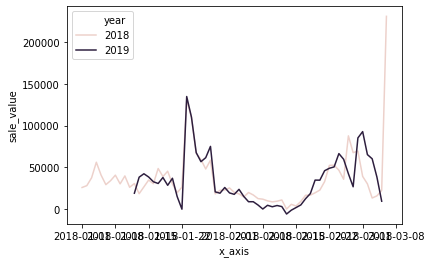

In [160]:
#同样，经过春节日期差平移后的数据在近期端偏快，需要往回平移
E_df.loc[E_df['year'] == 2019, 'x_axis'] += datetime.timedelta(days = 11)
sns.lineplot(x = 'x_axis', y = "sale_value", hue = 'year', data = E_df)

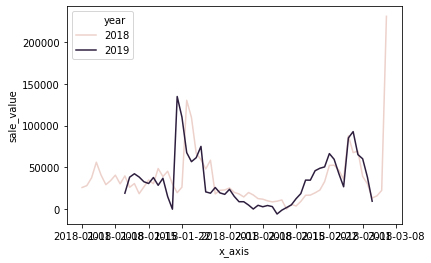

In [161]:
#和channel A不同，channel E往回平移2天最佳
E_df.loc[E_df['year'] == 2019, 'x_axis'] -= datetime.timedelta(days = 2)
sns.lineplot(x = 'x_axis', y = "sale_value", hue = 'year', data = E_df)

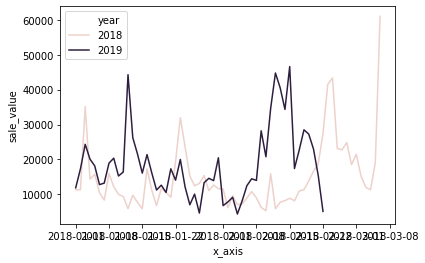

In [165]:
#channel G
G_df = date_pattern_compare(sub_df, channel = 'G')
sns.lineplot(x = 'x_axis', y = "sale_value", hue = 'year', data = G_df)

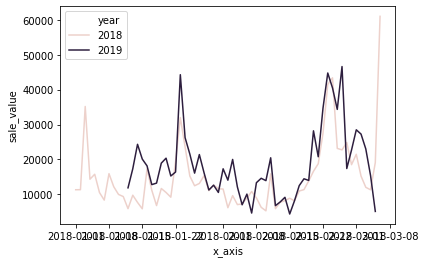

In [166]:
G_df.loc[G_df['year'] == 2019, 'x_axis'] += datetime.timedelta(days = 11)
sns.lineplot(x = 'x_axis', y = "sale_value", hue = 'year', data = G_df)

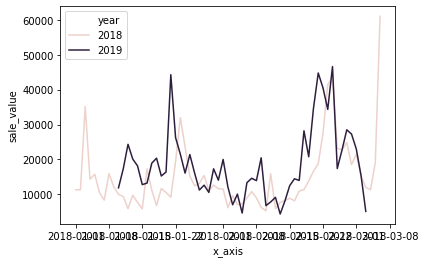

In [167]:
#channel G具有和channel E相似的数据pattern
G_df.loc[G_df['year'] == 2019, 'x_axis'] -= datetime.timedelta(days = 2)
sns.lineplot(x = 'x_axis', y = "sale_value", hue = 'year', data = G_df)

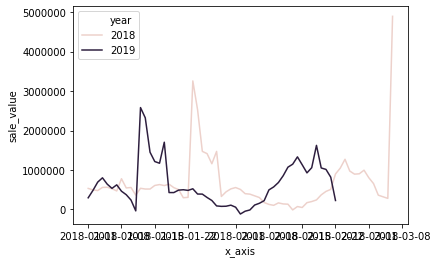

In [169]:
#channel H
H_df = date_pattern_compare(sub_df, channel = 'H')
sns.lineplot(x = 'x_axis', y = "sale_value", hue = 'year', data = H_df)

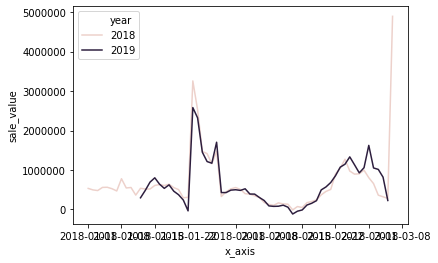

In [170]:
H_df.loc[H_df['year'] == 2019, 'x_axis'] += datetime.timedelta(days = 11)
sns.lineplot(x = 'x_axis', y = "sale_value", hue = 'year', data = H_df)

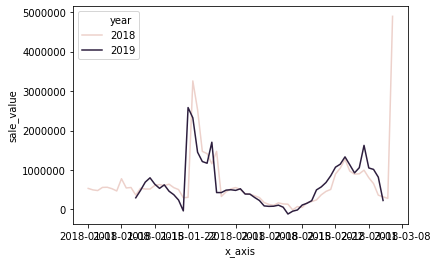

In [171]:
#channel H平移1天尤佳
H_df.loc[H_df['year'] == 2019, 'x_axis'] -= datetime.timedelta(days = 1)
sns.lineplot(x = 'x_axis', y = "sale_value", hue = 'year', data = H_df)

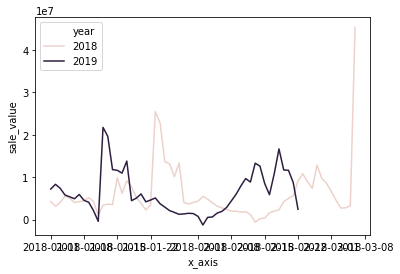

In [178]:
#channel J
J_df = date_pattern_compare(sub_df, channel = 'J')
sns.lineplot(x = 'x_axis', y = "sale_value", hue = 'year', data = J_df)

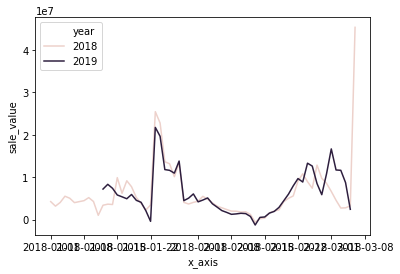

In [179]:
J_df.loc[J_df['year'] == 2019, 'x_axis'] += datetime.timedelta(days = 11)
sns.lineplot(x = 'x_axis', y = "sale_value", hue = 'year', data = J_df)

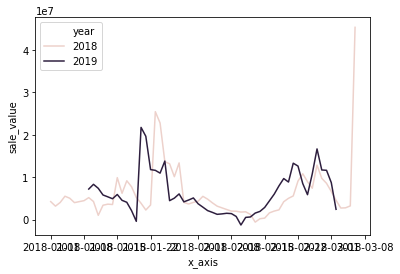

In [180]:
J_df.loc[J_df['year'] == 2019, 'x_axis'] -= datetime.timedelta(days = 3)
sns.lineplot(x = 'x_axis', y = "sale_value", hue = 'year', data = J_df)

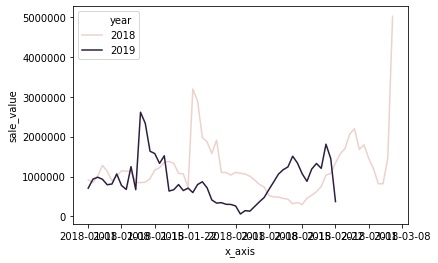

In [186]:
#channel U
U_df = date_pattern_compare(sub_df, channel = 'U')
sns.lineplot(x = 'x_axis', y = "sale_value", hue = 'year', data = U_df)

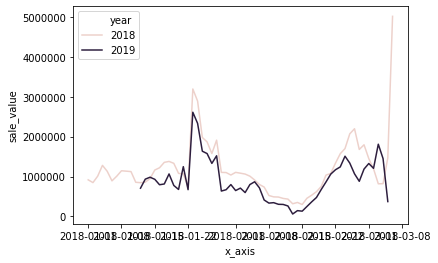

In [187]:
U_df.loc[U_df['year'] == 2019, 'x_axis'] += datetime.timedelta(days = 11)
sns.lineplot(x = 'x_axis', y = "sale_value", hue = 'year', data = U_df)

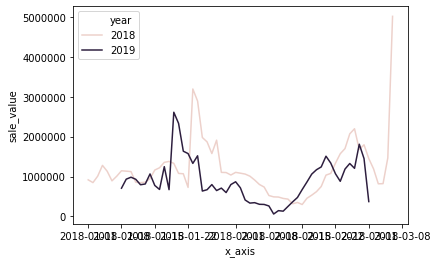

In [188]:
U_df.loc[U_df['year'] == 2019, 'x_axis'] -= datetime.timedelta(days = 4)
sns.lineplot(x = 'x_axis', y = "sale_value", hue = 'year', data = U_df)

In [ ]:
#由于数据量的限制以及同期数据之间交强的相关性特征，考虑采用移动平均的方式计算预测业务日的交易总量，并通过和同期数据在近期业务日不同渠道业务总量的对比进行小幅度修正